# 📊 YouTube Channel Performance Analysis

**Goal:** Explore real YouTube channel data to discover insights on video performance, posting strategy, and audience behavior.

**Dataset:** Real YouTube analytics data (views, revenue, watch time, posting days)

**Tools Used:** Python, Pandas, Matplotlib, Seaborn

---

## ✅ Key Objectives:
- Clean and prepare YouTube data for analysis
- Analyze video duration impact on views and revenue
- Identify the best days for posting content
- Explore correlation between different performance metrics


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()


Saving youtube_channel_real_performance_analytics.csv to youtube_channel_real_performance_analytics.csv


In [ ]:
# Load dataset
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")  # Use exact name after upload
df = pd.DataFrame(df)

# Remove columns with all zero values
df = df.loc[:, ~(df == 0).all()]

# Drop columns where more than 90% values are zero
threshold = 0.9
zero_fraction = (df == 0).mean()
df = df.loc[:, zero_fraction < threshold]


(df == 0).mean().sort_values(ascending=False).head(10)


# ---------------- Topic 1: Basic EDA ---------------------
print("\nDataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Overview:\n", df.head())




Dataset Shape: (364, 49)

Column Names:
 Index(['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish',
       'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)',
       'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)',
       'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)',
       'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)',
       'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)', 'New Comments',
       'Shares', 'Like Rate (%)', 'Dislikes', 'Likes', 'Unsubscribes',
       'New Subscribers', 'End Screen Click-Through Rate (%)',
       'End Screen Impressions', 'End Screen Clicks',
       'Teaser Click-Through Rate (%)', 'Teaser Impressions', 'Teaser Clicks',
       'Card Click-Through Rate (%)', 'Card Impressions', 'Card Clicks',
       'Views per Playlist Start', 'Playlist Views',
       'Playlist Watch Time (hours)', 'Clip Watch Time (hours)', 'Clip Views',
       'YouTube Premium Watch Time (hours)', '

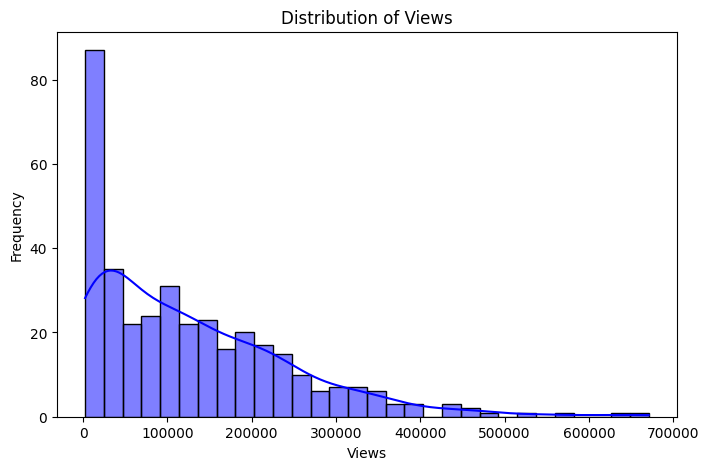

In [ ]:
# Visualizing the distribution of Views
plt.figure(figsize=(8, 5))
sns.histplot(df['Views'], bins=30, kde=True, color='blue')
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

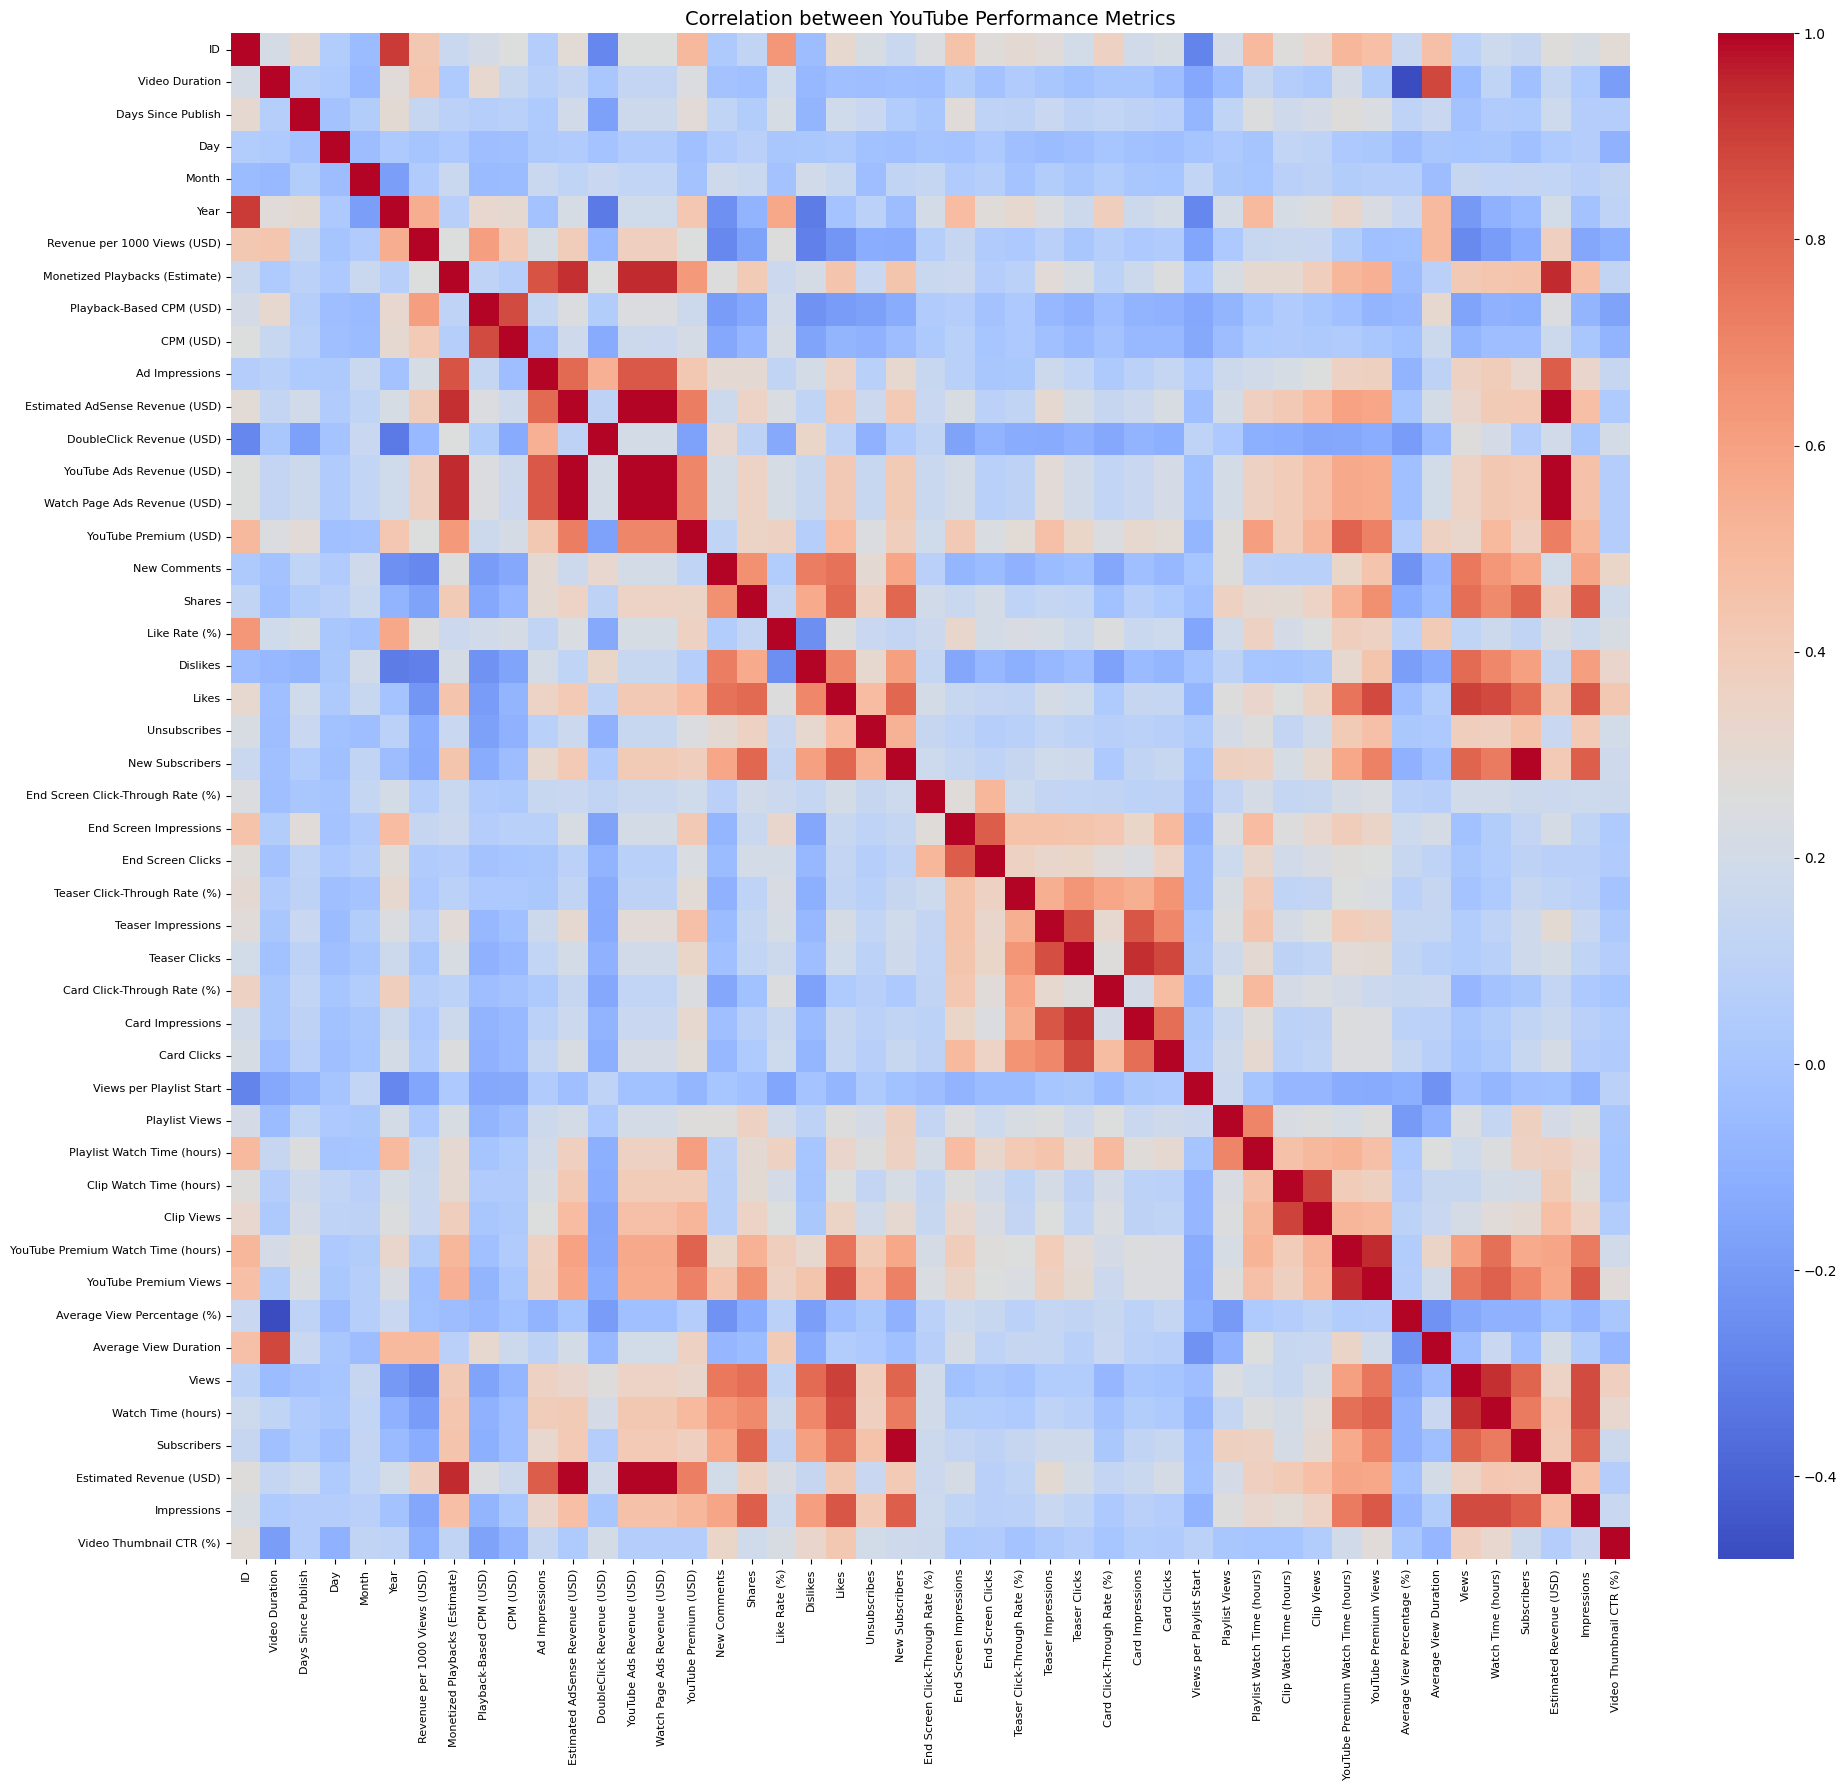

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations
corr = df.corr(numeric_only=True)

# Plot
plt.figure(figsize=(20, 18))  # Bigger canvas
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", cbar=True)

# Fix the labels
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.title("Correlation between YouTube Performance Metrics", fontsize=14)
plt.tight_layout()
plt.show()



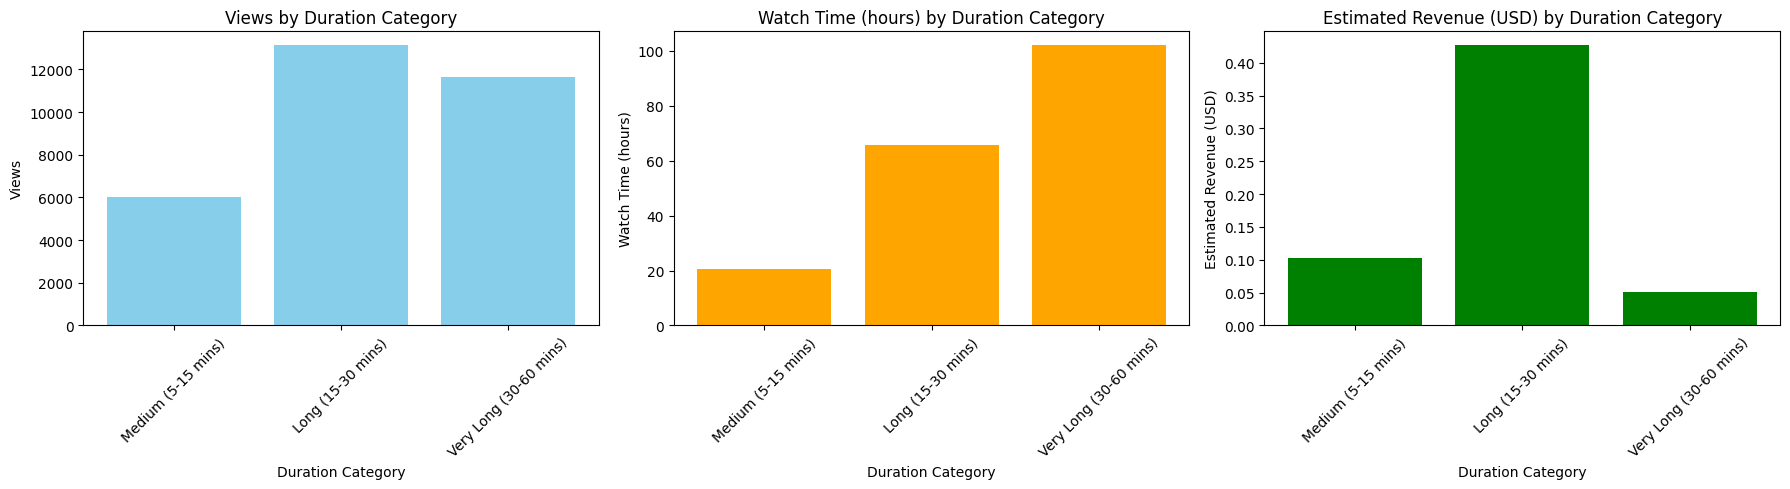

In [ ]:
# ---------------- Topic 2: Video Duration vs Performance ----------------
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['Views', 'Watch Time (hours)', 'Estimated Revenue (USD)']
colors = ['skyblue', 'orange', 'green']

for i, metric in enumerate(metrics):
    axs[i].bar(performance_metrics.index, performance_metrics[metric], color=colors[i])
    axs[i].set_title(f'{metric} by Duration Category')
    axs[i].set_ylabel(metric)
    axs[i].set_xlabel('Duration Category')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [ ]:
# Categorize videos by duration
def categorize_duration(duration):
    if duration < 5:
        return 'Short (<5 min)'
    elif duration < 15:
        return 'Medium (5–15 min)'
    else:
        return 'Long (>15 min)'

df['Duration Category'] = df['Video Duration'].apply(categorize_duration)

# Group by category and calculate average performance metrics
performance_metrics = df.groupby('Duration Category')[['Views', 'Watch Time (hours)', 'Estimated Revenue (USD)']].mean()


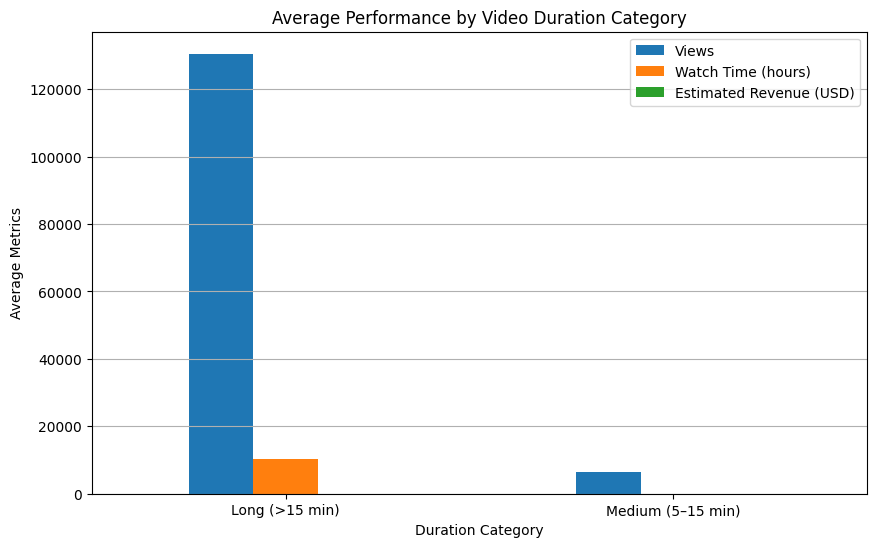

In [ ]:
performance_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Average Performance by Video Duration Category')
plt.ylabel('Average Metrics')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


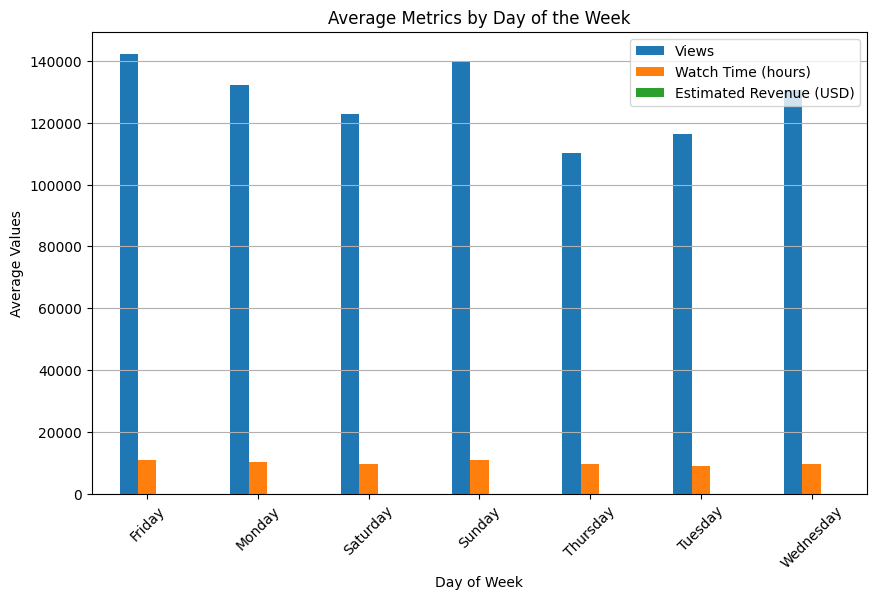

In [ ]:
# ---------------- Topic 3: Best Posting Day Analysis ----------------
# Group by day of the week
avg_metrics_by_day = df.groupby('Day of Week')[['Views', 'Watch Time (hours)', 'Estimated Revenue (USD)']].mean()

# Plot average metrics by day
avg_metrics_by_day.plot(kind='bar', figsize=(10, 6))
plt.title('Average Metrics by Day of the Week')
plt.ylabel('Average Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<Axes: xlabel='Day of Week', ylabel='Engagement'>

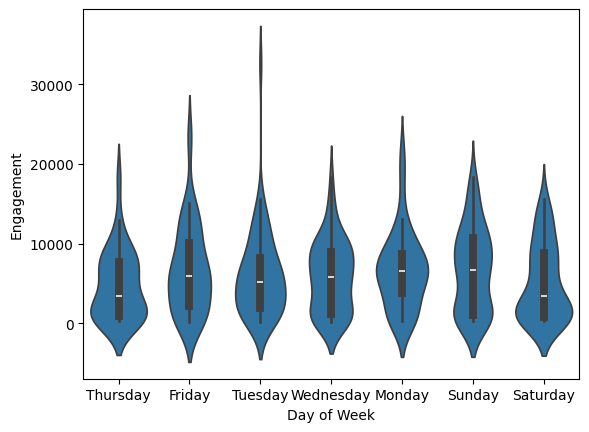

In [ ]:
# ---------------- Topic 4: Most Engaging Videos ----------------
sns.violinplot(data=df, x='Day of Week', y='Engagement')



In [ ]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_youtube_data.csv', index=False)


---

## 🔍 Key Insights:
- Videos longer than 15 minutes tend to generate more revenue.
- Mid-week videos (especially Wednesdays) receive higher engagement.

---

## 📁 Output:
- Final cleaned dataset saved as `cleaned_youtube_data.csv`

## 🚀 Next Steps:
- Build a predictive model to estimate video performance
- Create a Streamlit or Power BI dashboard for dynamic insights
